<a href="https://colab.research.google.com/github/marinamaer123/new_test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW_11_2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('/content/drive/MyDrive/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)


In [5]:

df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [6]:
monthly_count = df['count'].resample('ME').mean()

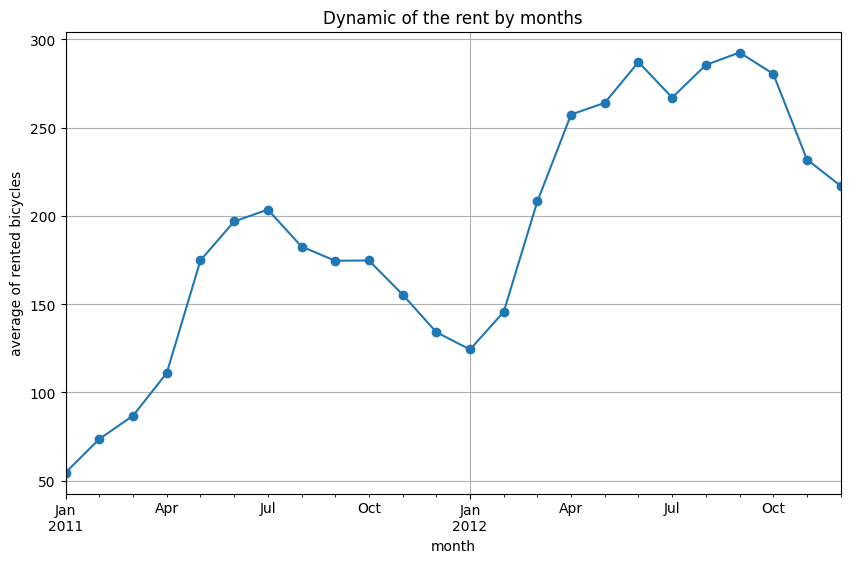

In [7]:
monthly_count.plot.line(
    figsize = (10,6),
    marker = 'o',
    title = 'Dynamic of the rent by months',
    grid = True,
    xlabel='month',
    ylabel='average of rented bicycles'
)
plt.show()

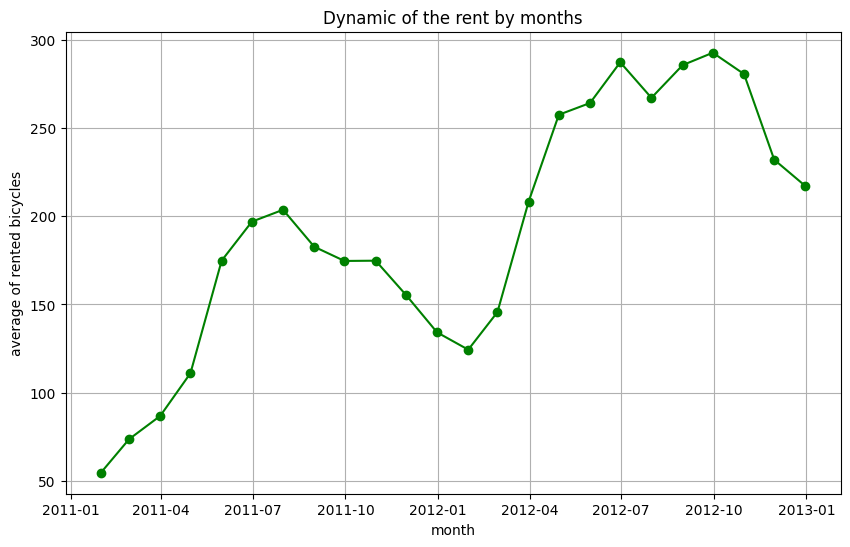

In [8]:
plt.figure(figsize=(10,6))
plt.plot(monthly_count,'g-o')
plt.title('Dynamic of the rent by months')
plt.xlabel('month')
plt.ylabel('average of rented bicycles')
plt.grid(True)

In [9]:
# There is different type of the grid and the line starts right from the edge on pandas plot
#while on matplotlib  there is some space before the line starts .The settings dive deeper on matplotlib .

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [10]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

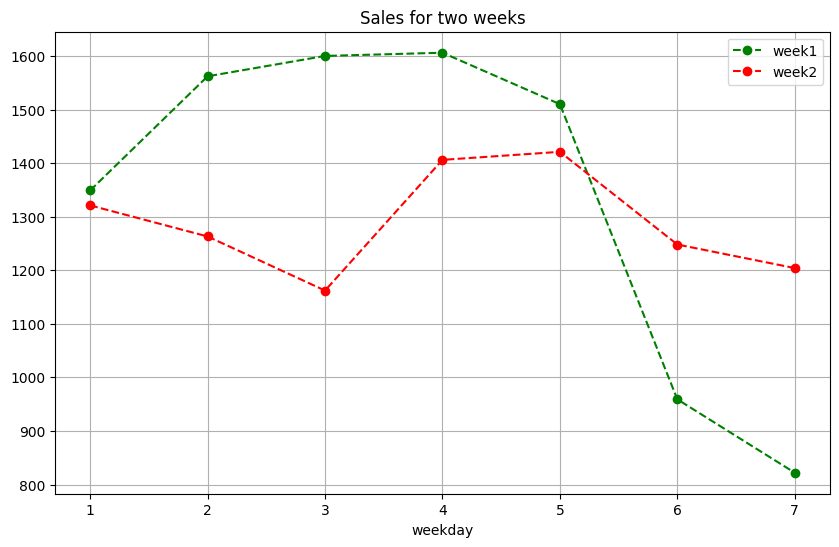

In [11]:
plt.figure(figsize=(10,6))
plt.plot(days,sales_week1, 'g--o',label='week1')
plt.plot(days,sales_week2, 'r--o',label='week2')
plt.title('Sales for two weeks')
plt.xlabel('weekday')
plt.legend()
plt.grid(True)

In [12]:
#Sales during second week more stable what we can see on line plot.We can check it by variance or std.

In [13]:
print(np.std(sales_week1),np.std(sales_week2))

299.99857142517004 90.9060964256355


In [14]:
print(np.var(sales_week1),np.std(sales_week2))

89999.14285714286 90.9060964256355


In [15]:
#Those calculations approved this statement.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [16]:
avg_temp = df['temp'].resample('ME').mean().round(2)


In [17]:
months = range(len(avg_temp))

In [18]:
avg_hours = df['hour'].resample('QE').mean().round(2)

In [19]:
avg_hours


,hour
datetime,
2011-03-31,11.76
2011-06-30,11.51
2011-09-30,11.52
2011-12-31,11.51
2012-03-31,11.53
2012-06-30,11.51
2012-09-30,11.50
2012-12-31,11.51


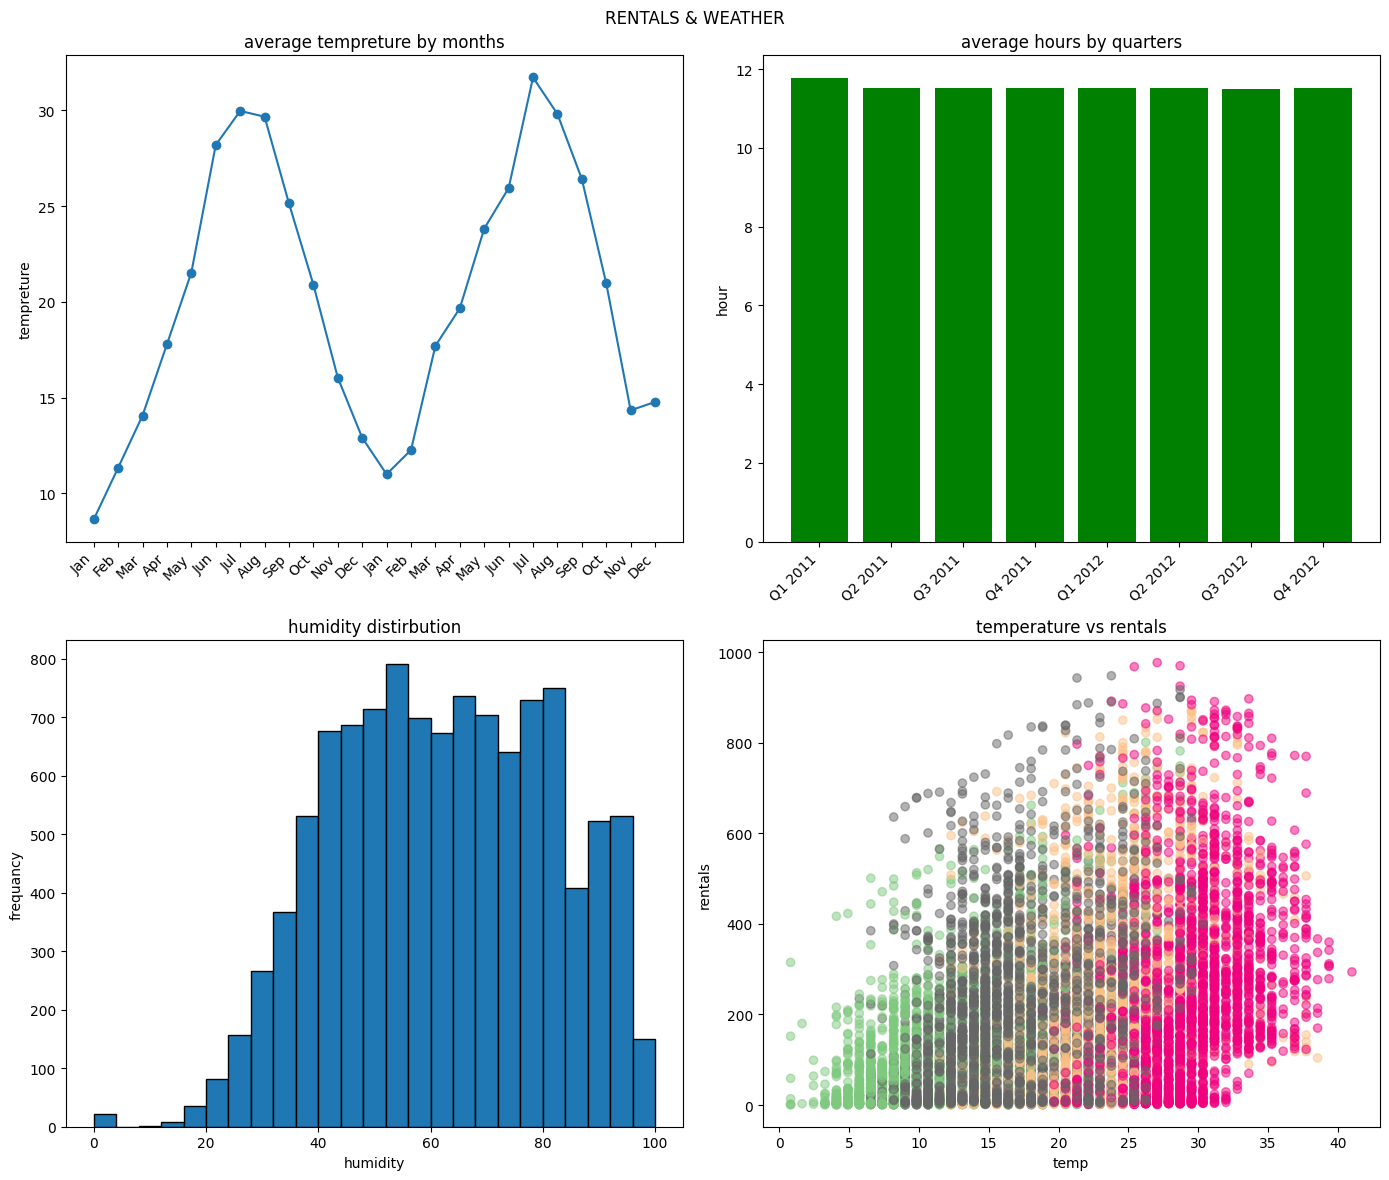

In [20]:
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
plt.plot(months,avg_temp.values,marker ='o')
plt.xticks(
    rotation=45,ha='right',
    ticks=months,
     labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('average tempreture by months')
plt.ylabel('tempreture')

plt.subplot(2,2,2)
plt.bar(avg_hours.index.astype(str),avg_hours.values, color = 'green')
plt.xticks(
    rotation=45,ha='right',
    ticks = avg_hours.index.astype(str),
    labels = ('Q' + avg_hours.index.quarter.astype(str)+ ' '
+ avg_hours.index.year.astype(str)))
plt.title('average hours by quarters')
plt.ylabel('hour')

plt.subplot(2,2,3)
plt.hist(df['humidity'],bins = 25,edgecolor='black')
plt.title('humidity distirbution')
plt.xlabel('humidity')
plt.ylabel('frequancy')

plt.subplot(2,2,4)
plt.scatter(df['temp'],df['count'],c=df['season'],cmap ='Accent',alpha=0.5)
plt.title('temperature vs rentals')
plt.xlabel('temp')
plt.ylabel('rentals')

plt.suptitle('RENTALS & WEATHER',fontsize=12)
plt.tight_layout()
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

/tmp/ipython-input-1571657591.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Q' + avg_hours.index.quarter.astype(str)[i]+ ' '


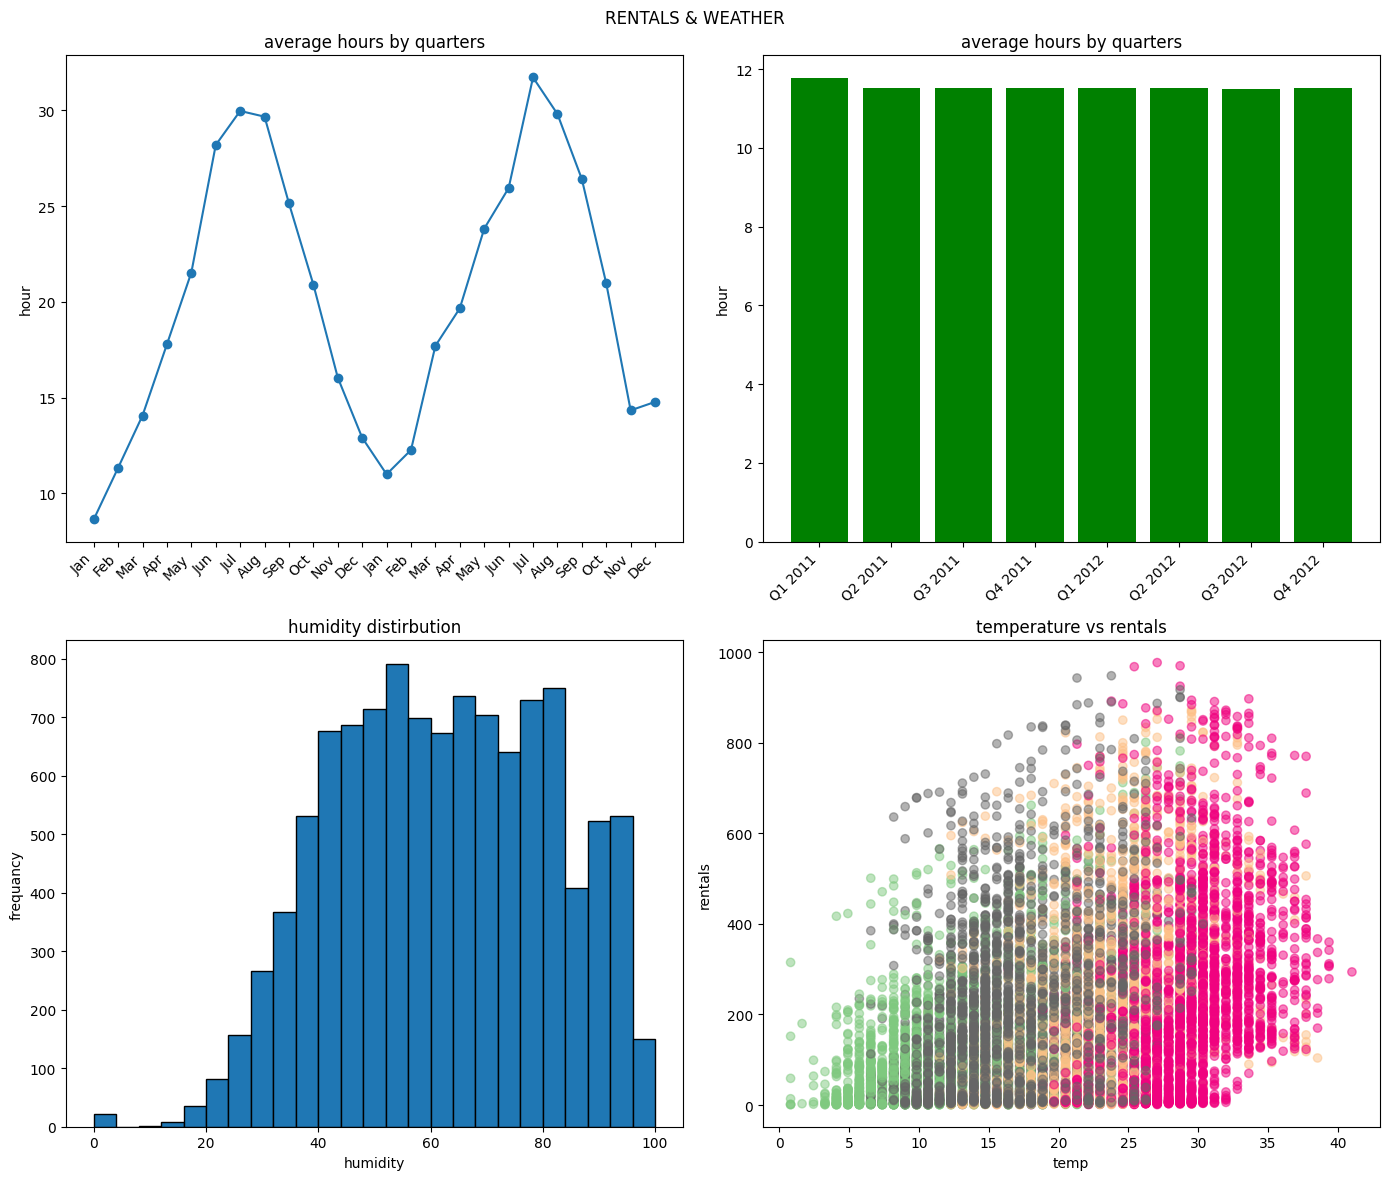

In [22]:
fig, axes = plt.subplots(2,2,figsize=(14,12))
axes[0, 0].plot(months, avg_temp.values,marker ='o')
axes[0, 0].set_xticks(months)
axes[0, 0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                           rotation = 45,
                           ha='right'

)
axes[0, 0].set_title('average hours by quarters')
axes[0, 0].set_ylabel('hour')

axes[0, 1].bar(avg_hours.index.astype(str),avg_hours.values,color='green')
axes[0, 1].set_xticklabels(['Q' + avg_hours.index.quarter.astype(str)[i]+ ' '
+ avg_hours.index.year.astype(str)[i]
                           for i in range (len(avg_hours))],
                           rotation=45,ha='right')
axes[0, 1].set_title('average hours by quarters')
axes[0, 1].set_ylabel('hour')

axes[1, 0].hist(df['humidity'],bins = 25,edgecolor='black')
axes[1, 0].set_title('humidity distirbution')
axes[1, 0].set_xlabel('humidity')
axes[1, 0].set_ylabel('frequancy')

scatter = axes[1, 1].scatter(df['temp'],df['count'],c=df['season'],cmap ='Accent',alpha=0.5)
axes[1, 1].set_title('temperature vs rentals')
axes[1, 1].set_xlabel('temp')
axes[1, 1].set_ylabel('rentals')

fig.suptitle('RENTALS & WEATHER',fontsize=12)
plt.tight_layout
plt.show()



In [ ]:
#The difference is that creating graphs via subplots has more flexible system which helps to make changes easier.
#But subplot method works well  for up to 4 graphs per one figure .

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [128]:
monthly_stats = df['count'].resample('ME').agg(['mean','max','min'])
monthly_stats['mean']=monthly_stats['mean'].round(2)
yearly_stats = df['count'].mean().round(2)
overral_std = df['count'].std()
overral_max = df['count'].max()
overral_min = df['count'].min()


In [129]:
max_date = monthly_stats['max'].idxmax()
max_val = monthly_stats.at[max_date,'max']
min_date = monthly_stats['min'].idxmin()
min_val = monthly_stats.at[min_date,'min']

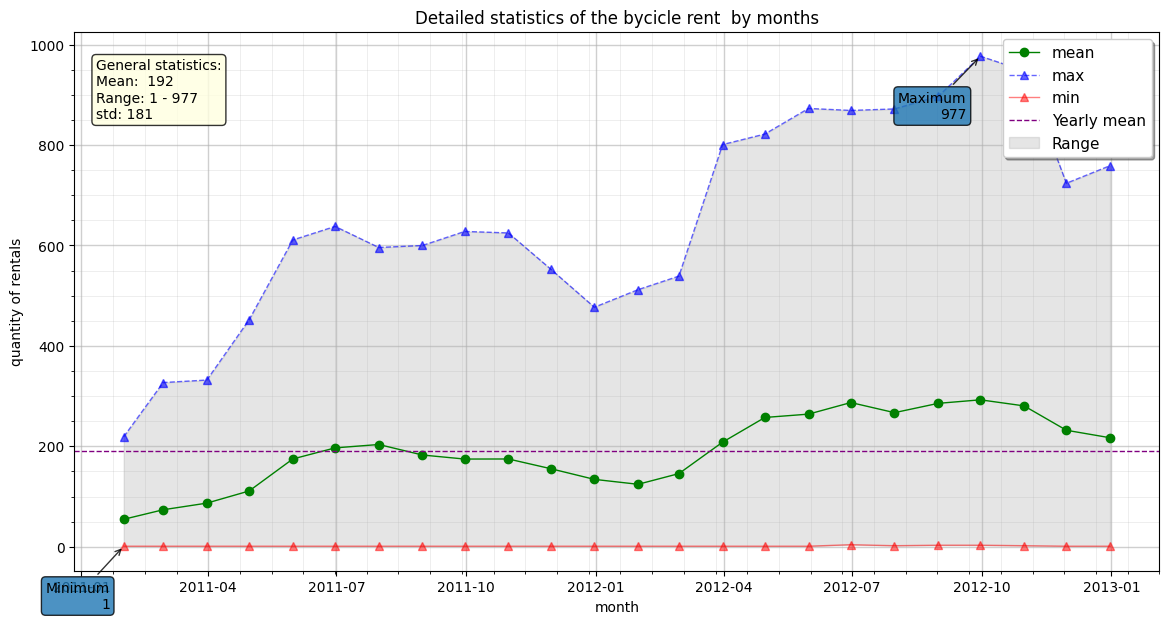

In [151]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(monthly_stats.index, monthly_stats['mean'], 'g-o',linewidth=1,label='mean')
ax.plot(monthly_stats.index, monthly_stats['max'], 'b--^',linewidth=1,label='max',alpha=0.6)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r-^',linewidth=1,label='min',alpha=0.5)

ax.axhline(y=yearly_stats,color='purple',linestyle = '--',linewidth=1, label='Yearly mean')

ax.set_title('Detailed statistics of the bycicle rent  by months')
ax.set_xlabel('month')
ax.set_ylabel('quantity of rentals')

ax.fill_between(monthly_stats.index,monthly_stats['min'],monthly_stats['max'],alpha = 0.2,color='grey',label = 'Range')

ax.legend(loc='upper right',fontsize=11,frameon=True,shadow=True,fancybox=True)

ax.annotate(f'Minimum\n{min_val:.0f}',
            xy=(min_date,min_val),
            xytext=(-10,-25),
            textcoords='offset points',
            bbox=dict(boxstyle='round', alpha=0.8),
            arrowprops=dict(arrowstyle='->',alpha=0.8),
            ha='right',va='top')
ax.annotate(f'Maximum\n{max_val:.0f}',
            xy=(max_date,max_val),
            xytext=(-10,-25),
            textcoords='offset points',
            bbox=dict(boxstyle='round', alpha=0.8),
            arrowprops=dict(arrowstyle='->',alpha=0.8),
            ha='right',va='top')

stats_text=("General statistics:\n"
            f"Mean: {yearly_stats: .0f}\n"
            f"Range: {overral_min:.0f} - {overral_max:.0f}\n"
            f"std: {overral_std:.0f}")

ax.text(0.02,0.95,stats_text,transform=ax.transAxes,va='top',ha='left',fontsize=10,
        bbox=dict(boxstyle='round',facecolor= 'lightyellow',edgecolor='black', alpha=0.8))
ax.minorticks_on()
ax.grid(True,which='major',linewidth=1,alpha=0.6)
ax.grid(True,which='minor',linewidth=0.5,alpha=0.3)

plt.show()

In [ ]:
#Adding annotations   may to give full statistical information and the main part is adding accents and flashes to the graph.
#Fill between fullfil the space mentioned in parameters .There is fill between is marker for the range from min to max.
#Text gives and additional information about data such as statistics .Allows to describe the graph more efficiently.